# Лабораторная работа №7 “Метод главных компонент”


In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.io import loadmat

## 1. Загрузите данные ex7data1.mat из файла.

In [127]:
mat = loadmat('data/ex7data1.mat')
X = mat['X']
X.shape

(50, 2)

## 2. Постройте график загруженного набора данных.

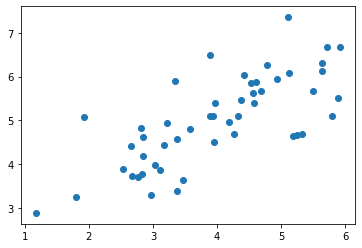

In [128]:
plt.scatter(X[:,0], X[:,1])

## 3. Реализуйте функцию вычисления матрицы ковариации данных.

In [129]:
def cov_matrix(X):
    return np.dot(X.T, X) / X.shape[0]

## 4. Вычислите координаты собственных векторов для набора данных с помощью сингулярного разложения матрицы ковариации (разрешается использовать библиотечные реализации матричных разложений).

In [130]:
def normalize_features(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    X_norm = (X - mu)/sigma
    
    return X_norm, mu , sigma

In [131]:
from numpy.linalg import svd

def pca(X):
    sigma = cov_matrix(X)
    return svd(sigma)

In [132]:
X_norm, mu, std = normalize_features(X)
U, S, V = pca(X_norm)
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

## 5. Постройте на графике из пункта 2 собственные векторы матрицы ковариации.


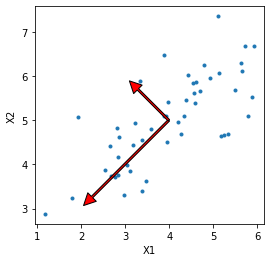

In [133]:
mu = X.mean(axis=0)
projected_data = np.dot(X, U)
sigma = projected_data.std(axis=0).mean()

fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], marker='o', linestyle="None", markersize=3)
for ind, axis in enumerate(U):
    start, end = mu, mu + (S[ind] + sigma) * axis
    ax.annotate(
        '', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=2.0))
ax.set_aspect('equal')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

In [134]:
U[:,0]

array([-0.70710678, -0.70710678])

## 6. Реализуйте функцию проекции из пространства большей размерности в пространство меньшей размерности с помощью метода главных компонент.


In [135]:
def make_projection(X, U, K):
    U_reduce = U[:, :K]
    return np.dot(X, U_reduce)

In [141]:
Z = make_projection(X_norm, U, 1)
Z.shape

(50, 1)

## 7. Реализуйте функцию вычисления обратного преобразования.

In [142]:
def recover(Z, U, K=None):
    U_reduce = U[:, :K]
    return np.dot(Z, U_reduce.T)

In [143]:
X_rec  = recover(Z, U, 1)

## 8. Постройте график исходных точек и их проекций на пространство меньшей размерности (с линиями проекций).


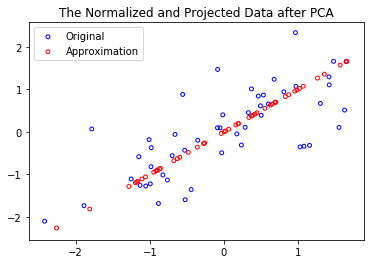

In [144]:
plt.scatter(X_norm[:,0],X_norm[:,1],marker="o",label="Original",facecolors="none",edgecolors="b",s=15)
plt.scatter(X_rec[:,0],X_rec[:,1],marker="o",label="Approximation",facecolors="none",edgecolors="r",s=15)
plt.title("The Normalized and Projected Data after PCA")
plt.legend()

## 9. Загрузите данные ex7faces.mat из файла.

In [147]:
mat = loadmat("data/ex7faces.mat")
X = mat["X"]

## 10. Визуализируйте 100 случайных изображений из набора данных.


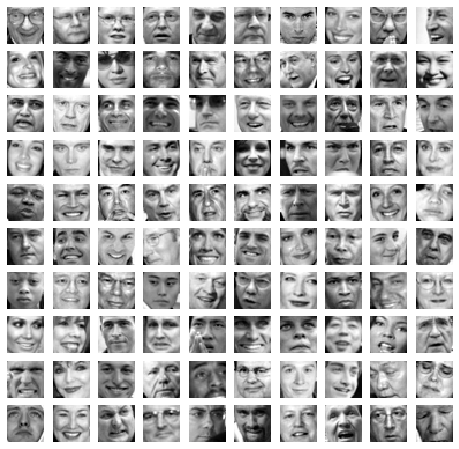

In [150]:
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(8,8))
for i in range(0, 100, 10):
    for j in range(10):
        ax[int(i/10),j].imshow(X[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax[int(i/10),j].axis("off")

## 11. С помощью метода главных компонент вычислите собственные векторы.

In [153]:
X_norm, *_ = normalize_features(X)
U, S, V = pca(X_norm)

## 12. Визуализируйте 36 главных компонент с наибольшей дисперсией.

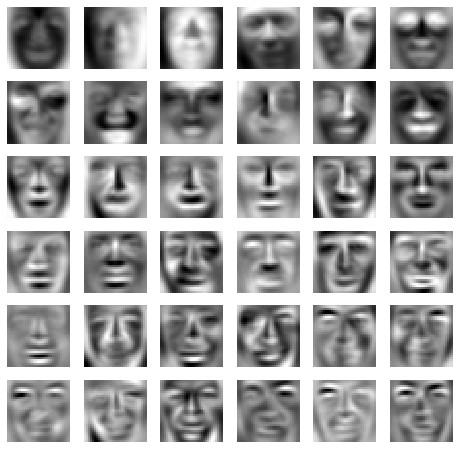

In [165]:
U_reduced = U[:,:36].T
fig2, ax2 = plt.subplots(6,6,figsize=(8,8))
for i in range(0,36,6):
    for j in range(6):
        ax2[int(i/6),j].imshow(U_reduced[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax2[int(i/6),j].axis("off")

## 13. Как изменилось качество выбранных изображений?

Качество ухудшилось. Хорошо видно только черты лица.

## 14. Визуализируйте 100 главных компонент с наибольшей дисперсией.

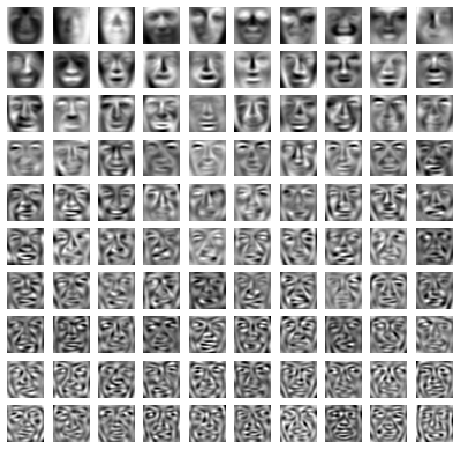

In [166]:
U_reduced = U[:,:100].T
fig2, ax2 = plt.subplots(10, 10, figsize=(8,8))
for i in range(0,100, 10):
    for j in range(10):
        ax2[int(i/10),j].imshow(U_reduced[i+j,:].reshape(32,32,order="F"),cmap="gray")
        ax2[int(i/10),j].axis("off")

## 15. Как изменилось качество выбранных изображений?


Аналогично, как и в прошлом примере. Качество ухудшилось. Хорошо видно только черты лица.

## 16. Используйте изображение, сжатое в лабораторной работе №6 (Кластеризация).


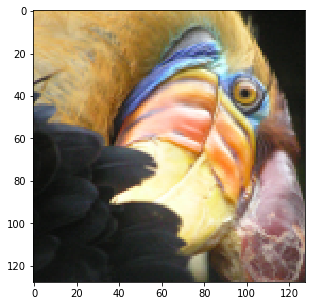

In [169]:
mat = loadmat('data/bird_small.mat')
A = mat['A']
fig, axs = plt.subplots(ncols=1, figsize=[12, 5])
axs.imshow(A)
plt.show()

## 17. С помощью метода главных компонент визуализируйте данное изображение в 3D и 2D.


In [176]:
Ax = np.reshape(A, [A.shape[0] * A.shape[1], A.shape[2]])
Ax_norm, *_ = normalize_features(Ax)
U, S, V = pca(Ax_norm)
Ax_reduced = make_projection(Ax_norm, U, 2)
Ax_approx = recover(Ax_reduced, U, 2)

<IPython.core.display.Javascript object>


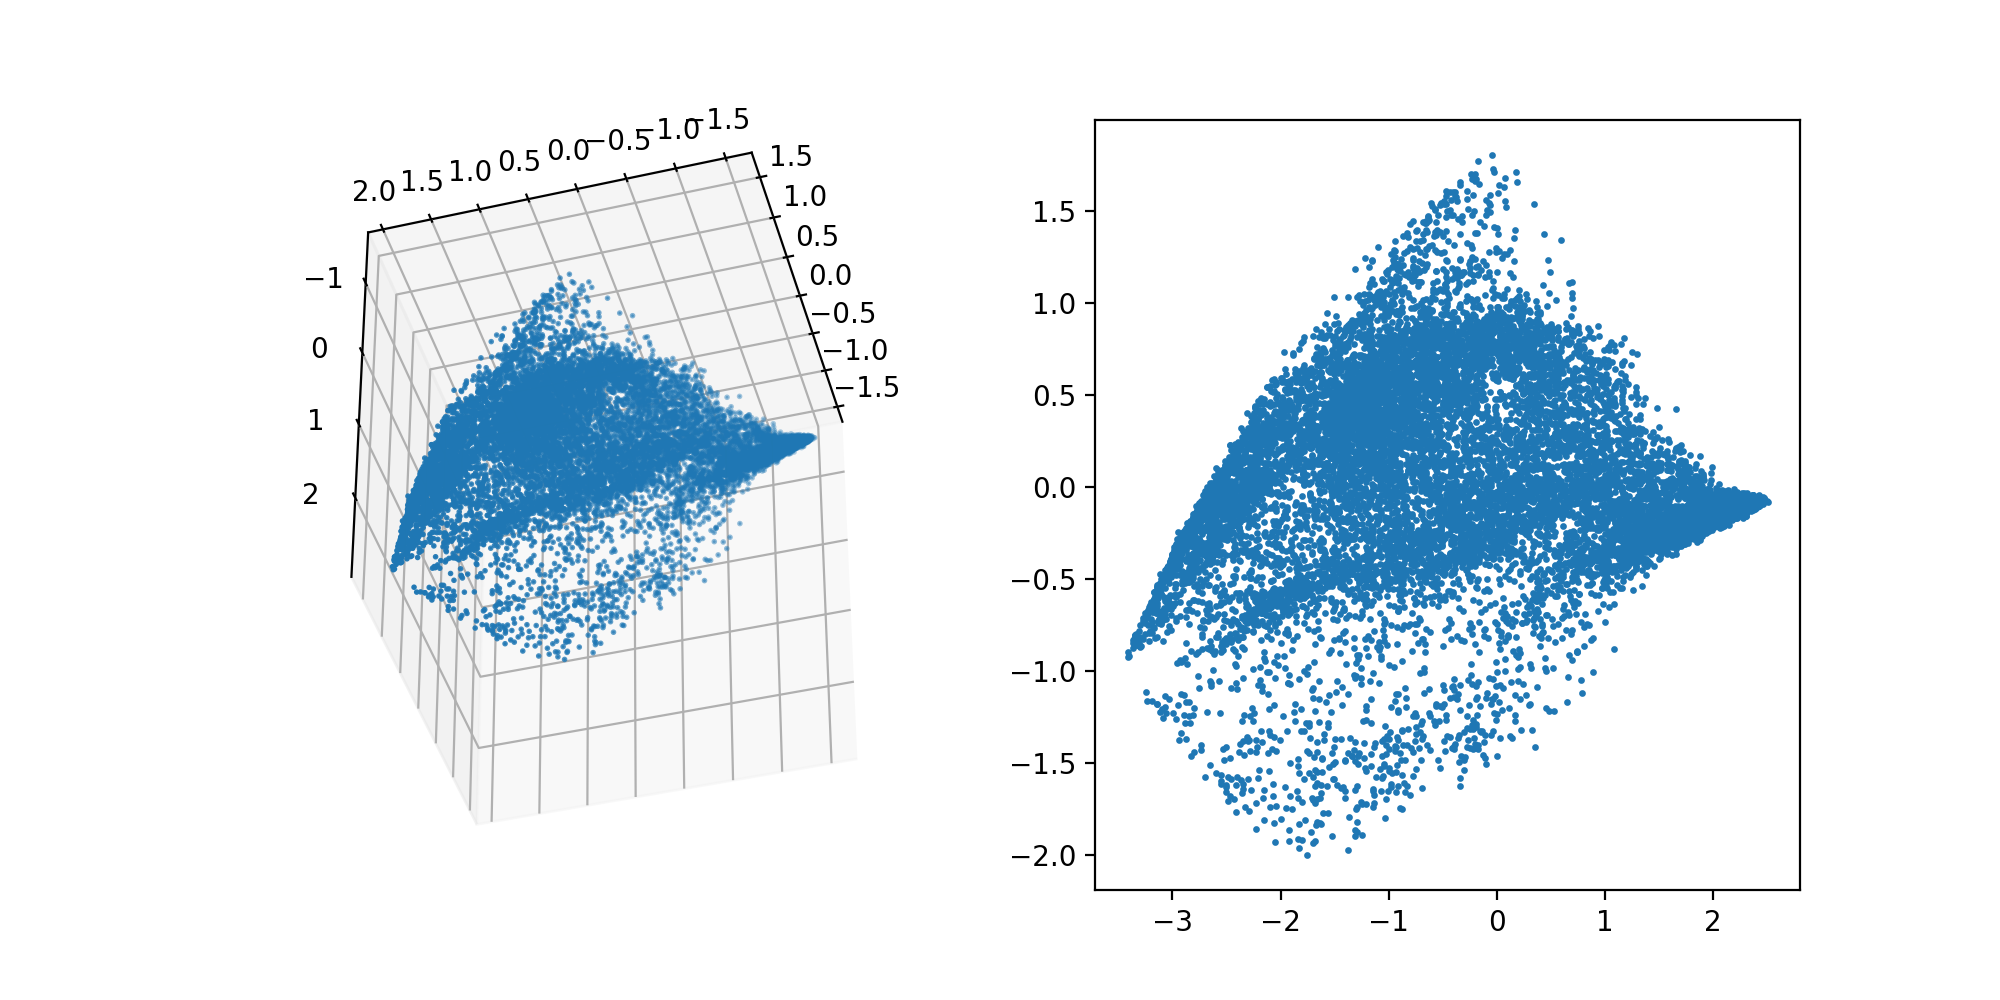

In [184]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(xs=Ax_approx[:, 0], ys=Ax_approx[:, 1], zs=Ax_approx[:, 2], cmap=cm.coolwarm, s=1)

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(Ax_reduced[:, 0], Ax_reduced[:, 1], cmap=cm.coolwarm, s=2)
plt.show()

## 18. Соответствует ли 2D изображение какой-либо из проекций в 3D?


2D плоскость будет являться одной из проекций 3D изображении.